In [121]:
%matplotlib inline
from Constants import Constants
import mesa_reader as mr
import pandas
import numpy as np
import matplotlib.pyplot as plt
c=Constants()

###### Some plt choices ###########
plt.rcParams['figure.figsize'] = (6,5)
plt.rc_fonts = {'figure.figsize': (15, 9.3)}
plt.rcParams['font.family'] = ['Times New Roman']
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['legend.handlelength'] = 1
plt.rcParams["legend.framealpha"] = 1.0
plt.rcParams['axes.titlepad'] = 20 
plt.rc('legend', borderpad=0.2, markerscale=15., fancybox=False)
##########################################

# Define some useful functions
def find_zams(logl,loglh,model):
    zams=0
    while (loglh[zams] < 0.99*logl[zams]):
     zams=zams+1
    return zams;

def find_hezams(logl,loglhe,model):
    zams=0
    while (loglhe[zams] < 0.90*logl[zams]):
     zams=zams+1
    return zams;

def find_teff(teff,model,val):
    ii=0
    while (teff[ii] > val) and (ii+1 < len(model)):
     ii=ii+1
    return ii;

def find_h1(h1,model,val):
    ii=0
    while (h1[ii] > val) and (ii+1 < len(model)):
     ii=ii+1
    return ii;
def const_radius_on_hrd(T,R):
    return 4*np.pi*R**2*c.sigmaSB*T**4

Constants defined...


In [122]:
# Define some colors
BLACK      = (0.00,0.00,0.00)
ORANGE     = (0.90,0.60,0.00)
SKY_BLUE   = (0.35,0.70,0.90)
BLUE_GREEN = (0.00,0.60,0.50)
YELLOW     = (0.95,0.90,0.25)
BLUE       = (0.00,0.45,0.70)
VERMILLION = (0.80,0.40,0.00)
RED_PURPLE = (0.80,0.60,0.70)
COLORS=[ORANGE,BLUE_GREEN,SKY_BLUE,RED_PURPLE,VERMILLION,YELLOW,BLUE,BLACK]

# Set some global plot options
#plt.rcParams['figure.figsize'] = (6,5)
plt.rcParams['legend.frameon'] = False
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['legend.borderpad'] = 0.1
plt.rcParams['legend.labelspacing'] = 0.1
plt.rcParams['legend.handletextpad'] = 0.1
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['font.size'] = 16



In [140]:
DATA='./CCA-relaxation-project/' 
DATA='./ms1_mp0.001_rp0.1_rs4_a4.5_tides/' 
#DATA='./ms1_mp0.001_rp0.1_rs10_a10.5_tides/' 

#DATA='./test/' 


In [141]:
#h = mr.MesaData(DATA+'history_r5_proper.data')
h = mr.MesaData(DATA+'LOGS/'+'history.data')


From read_log_data  5
From read_log_data header: ['15140', 'gfortran', '10.2.0', 'x86_64-macos-21.11.1', 'CRMATH', '20220208', 50.0, 1000.0]


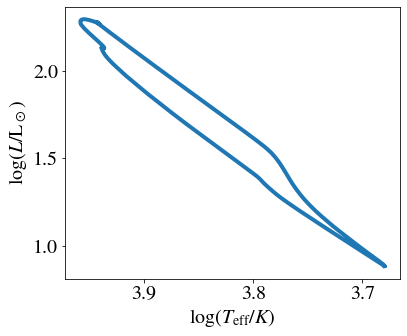

In [142]:
logl=h.log_L
logt=h.log_Teff

plt.plot(logt,logl,linewidth=4)

#plt.axis([3.87,3.65, 1, 2.1])
plt.xlabel(r'$\log \left( T_{\rm eff} / K \right)$')
plt.ylabel(r'$\log \left( L / {\rm L}_\odot \right)$')
plt.gca().invert_xaxis()

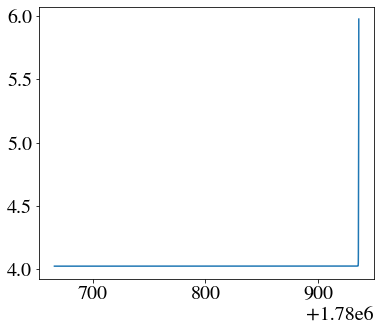

In [143]:
# Find where engulfment occurs
eng_f=h.Engulfed_fraction
dest_f=10**h.Log_Destruction_factor
planet_location=h.Orbital_separation
star_radius=10**h.log_R
model= h.model_number
#print(eng_f)
eng=np.where(eng_f>0)
dest = np.where(dest_f<1)
#print(dest_f)
#print(dest)
star_radius=10**h.log_R
age=(h.star_age)

sel = np.where(np.in1d(dest,eng))
#print(sel)
plt.plot(age[sel],star_radius[sel])

(1780935.1867066992, 1780936.1867066992, 4.019543245076105, 5.980260114830445)

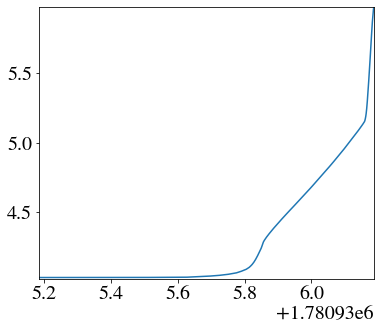

In [144]:
plt.plot(age[sel],star_radius[sel])
plt.axis([age[sel][-1]-1,age[sel][-1], np.min(star_radius),np.max(star_radius)])


Text(0, 0.5, '$\\log \\left( L / {\\rm L}_\\odot \\right)$')

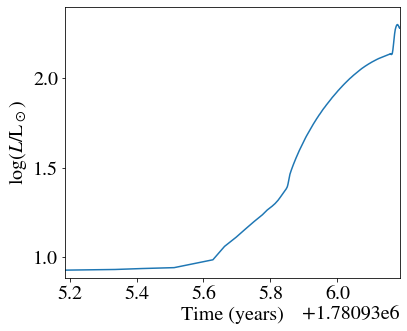

In [145]:
Rsun= 6.9598e10


secyer=3600*24*365
plt.plot(age[sel],logl[sel])
plt.axis([age[sel][-1]-1,age[sel][-1], np.min(logl),np.max(logl)+0.1])

#plt.axis([655.4*365,656.1*365, 1,2.1])
#plt.axis([235753.5,235826.5, 1,2.1])
#plt.axis([0,0.55e6, 0.7, 2.5])
plt.xlabel(r'Time (years)')
plt.ylabel(r'$\log \left( L / {\rm L}_\odot \right)$')

Text(0, 0.5, '$ R / {\\rm R}_\\odot$')

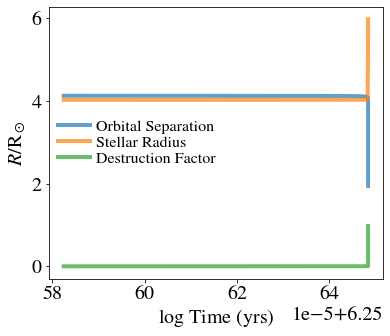

In [146]:
#secyer=3600*24*365
#age=(h.star_age_sec)/secyer

mdot=h.log_abs_mdot
infall=10**h.Log_Infall_distance
injected_e=(h.Log_Injected_energy)
v_orb=h.Orbital_velocity
dest_f=10**h.Log_Destruction_factor
eng_f=h.Engulfed_fraction
mass_heated=h.Total_mass_affected
planet_location=h.Orbital_separation
logdt=h.log_dt
star_radius=10**h.log_R
t0=0
plt.plot(np.log10(age[sel]),planet_location[sel],linewidth=4,alpha=0.7,label=' Orbital Separation')
plt.plot(np.log10(age[sel]),star_radius[sel],linewidth=4,alpha=0.7,label=' Stellar Radius')
plt.plot(np.log10(age[sel]),dest_f[sel],linewidth=4,alpha=0.7,label=' Destruction Factor')
#plt.plot(age,np.log10(v_orb))
#plt.axis([655.4*365,656.1*365, 1,2.1])
#plt.axis([235753.5,235826.5, 1,2.1])
plt.legend(handlelength=2,frameon=False,loc="center left",fontsize=16)
#plt.axis([3,6, -1 , 5.9])
plt.xlabel(r'$\log$ Time (yrs)')
plt.ylabel(r'$ R / {\rm R}_\odot$')

4.355979088716998e+44


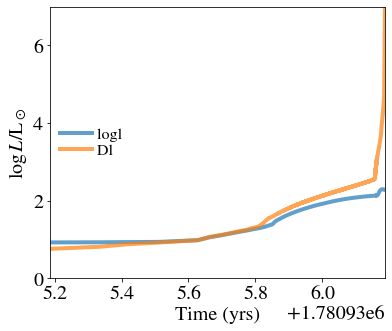

In [147]:
#secyer=3600*24*365
#age=(h.star_age_sec)/secyer
lsun = 3.839e33
secyer = 3600*24*365
mdot=h.log_abs_mdot
infall=10**h.Log_Infall_distance
injected_e=(h.Log_Injected_energy)
v_orb=h.Orbital_velocity
dest_f=10**h.Log_Destruction_factor
eng_f=h.Engulfed_fraction
mass_heated=h.Total_mass_affected
planet_location=h.Orbital_separation
logdt=h.log_dt
star_radius=10**h.log_R
t0=0
dl = 10**injected_e/((10**logdt)*secyer)



#plt.plot(np.log10(age),planet_location,linewidth=4,alpha=0.7,label=' Orbital Separation')
#plt.plot(np.log10(age),star_radius,linewidth=4,alpha=0.7,label=' Stellar Radius')
plt.plot(age[sel],logl[sel],linewidth=4,alpha=0.7,label=' logl')
plt.plot(age[sel],np.log10(dl[sel]/lsun),linewidth=4,alpha=0.7,label=' Dl')
#plt.plot(age,np.log10(v_orb))
#plt.axis([655.4*365,656.1*365, 1,2.1])
#plt.axis([235753.5,235826.5, 1,2.1])
plt.legend(handlelength=2,frameon=False,loc="center left",fontsize=16)
#plt.axis([.542696e6,0.542698e6, -1 , 8])
plt.xlabel(r'Time (yrs)')
plt.ylabel(r'$\log\, L / {\rm L}_\odot$')
plt.axis([age[sel][-1]-1,age[sel][-1], 0,7])

print(sum(10**injected_e))

4.355979088716998e+44


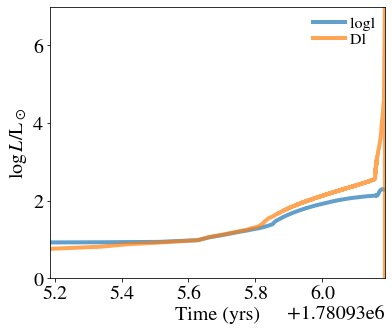

In [148]:
#secyer=3600*24*365
#age=(h.star_age_sec)/secyer
lsun = 3.839e33
secyer = 3600*24*365
mdot=h.log_abs_mdot
infall=10**h.Log_Infall_distance
injected_e=(h.Log_Injected_energy)
v_orb=h.Orbital_velocity
dest_f=10**h.Log_Destruction_factor
eng_f=h.Engulfed_fraction
mass_heated=h.Total_mass_affected
planet_location=h.Orbital_separation
logdt=h.log_dt
star_radius=10**h.log_R
t0=0
dl = 10**injected_e/((10**logdt)*secyer)



#plt.plot(np.log10(age),planet_location,linewidth=4,alpha=0.7,label=' Orbital Separation')
#plt.plot(np.log10(age),star_radius,linewidth=4,alpha=0.7,label=' Stellar Radius')
plt.plot(age,logl,linewidth=4,alpha=0.7,label=' logl')
plt.plot(age,np.log10(dl/lsun),linewidth=4,alpha=0.7,label=' Dl')
#plt.plot(age,np.log10(v_orb))
#plt.axis([655.4*365,656.1*365, 1,2.1])
#plt.axis([235753.5,235826.5, 1,2.1])
plt.legend(handlelength=2,frameon=False,loc="upper right",fontsize=16)
plt.axis([age[sel][-1]-1,age[sel][-1], 0,7])


plt.xlabel(r'Time (yrs)')
plt.ylabel(r'$\log\, L / {\rm L}_\odot$')

print(sum(10**injected_e))

Text(0, 0.5, '$ R / {\\rm R}_\\odot$')

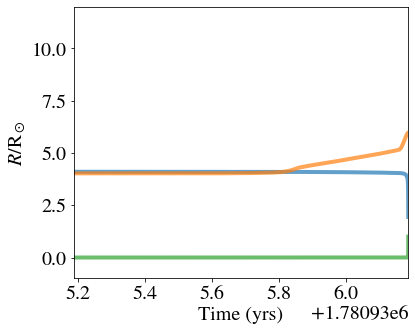

In [149]:
#secyer=3600*24*365
#age=(h.star_age_sec)/secyer

mdot=h.log_abs_mdot
infall=10**h.Log_Infall_distance
injected_e=(h.Log_Injected_energy)
v_orb=h.Orbital_velocity
dest_f=10**h.Log_Destruction_factor
eng_f=h.Engulfed_fraction
mass_heated=h.Total_mass_affected
planet_location=h.Orbital_separation
logdt=h.log_dt
star_radius=10**h.log_R
t0=0
plt.plot(age,planet_location,linewidth=4,alpha=0.7)
plt.plot(age,star_radius,linewidth=4,alpha=0.7)
plt.plot(age,dest_f,linewidth=4,alpha=0.7)
#plt.plot(age,np.log10(v_orb))
#plt.axis([655.4*365,656.1*365, 1,2.1])
#plt.axis([235753.5,235826.5, 1,2.1])
plt.axis([2690,2701.5, 3.95, 4.15])
plt.axis([age[sel][-1]-1,age[sel][-1], -1,12])

plt.xlabel(r'Time (yrs)')
plt.ylabel(r'$ R / {\rm R}_\odot$')

Text(0, 0.5, '$ R / {\\rm R}_\\odot$')

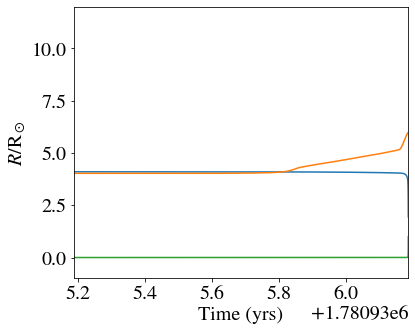

In [150]:
#secyer=3600*24*365
#age=(h.star_age_sec)/secyer

mdot=h.log_abs_mdot
infall=10**h.Log_Infall_distance
injected_e=(h.Log_Injected_energy)
v_orb=h.Orbital_velocity
dest_f=10**h.Log_Destruction_factor
eng_f=h.Engulfed_fraction
mass_heated=h.Total_mass_affected
planet_location=h.Orbital_separation
logdt=h.log_dt
star_radius=10**h.log_R
t0=0
plt.plot(age,planet_location)
plt.plot(age,star_radius)
plt.plot(age,dest_f)
#plt.plot(age,np.log10(v_orb))
#plt.axis([655.4*365,656.1*365, 1,2.1])
#plt.axis([235753.5,235826.5, 1,2.1])
plt.axis([age[sel][-1]-1,age[sel][-1], -1,12])
plt.xlabel(r'Time (yrs)')
plt.ylabel(r'$ R / {\rm R}_\odot$')

4.355979088716998e+44


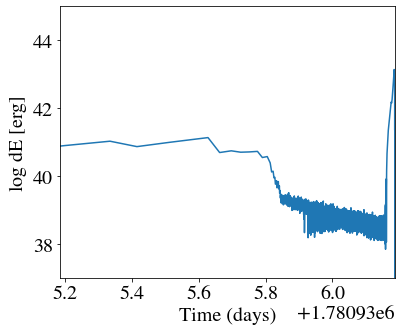

In [151]:
plt.plot(age,injected_e)
#plt.plot(age,star_radius)
#plt.axis([655.4*365,656.1*365, 1,2.1])
#plt.axis([235753.5,235826.5, 1,2.1])
plt.axis([age[sel][-1]-1,age[sel][-1], 37,45])
plt.xlabel(r'Time (days)')
plt.ylabel(r'$\log  $ dE [erg]')
dt=10**logdt
print(sum(10**injected_e))

In [152]:
# Number of orbits per timesep 
age=(h.star_age)#*365.0
r=h.Orbital_separation*c.rsun # cm
vv=h.Orbital_velocity*1e5 # cm/s
dt=(10**h.log_dt)*secyer # s
orbits_dt=(vv*dt)/(2*np.pi*r)
f=h.Log_Destruction_factor
area=h.Engulfed_fraction

# Find Grazing Phase
#print(np.where(f<0))
#print(np.where(area<1.0))

# Find Engulfment Phase
#print(np.where(area==1.0))

# End of Engulfment 

# Find dynamical engulfment phase
# End of phase (destruction)
i=0
while (f[i] <= 0.0):
    i=i+1
# Beginning of phase (end grazing)
j=0
while (area[j] < 1.0) and (j <= len(area)):
    j=j+1
    
print(i,j)




14639 1000


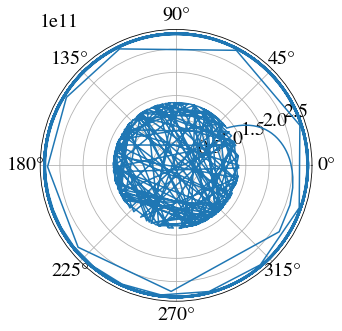

In [153]:
alpha=np.zeros(len(vv))
alpha[0]=0.0
i=1
while (i<len(vv)-1):
 dalpha = (vv[i]*dt[i])/(2*np.pi*r[i]) # dalpha = 1 if vdt = 2pir 
 alpha[i] = alpha[i-1]+dalpha 
 i = i+1  

ax = plt.subplot(111, projection='polar')
#ax.plot(alpha[j+12:i-130] , r[j+12:i-130])
ax.plot(alpha[j+20:i] , r[j+20:i])
ax.set_rscale('linear')

In [154]:
h = mr.MesaData(DATA+'/LOGS/history.data')
age=h.star_age
area=h.Engulfed_fraction
destruction=h.Log_Destruction_factor
dyn_start=np.where(area > 0.999)[0][0]
dyn_end=np.where(destruction > 0.0)[0][0]
#xlims = [(age[dyn_start])-0.0000006,(age[dyn_end]*1e-6)+0.0000005]
xlims = [age[dyn_start]+0.3,age[dyn_end]+0.01]


print(xlims)
#xlims=[0,750]
#mkipp.kipp_plot(mkipp.Kipp_Args(logs_dirs=["1.0_energy_injection_runs/LOGS"],save_filename = "Kippenhahn_r.pdf",xaxis = "star_age",yaxis='radius', time_units = "yr"),xlims = xlims)




From read_log_data  5
From read_log_data header: ['15140', 'gfortran', '10.2.0', 'x86_64-macos-21.11.1', 'CRMATH', '20220208', 50.0, 1000.0]
[1780936.1420667334, 1780936.1967137652]


./ms1_mp0.001_rp0.1_rs4_a4.5_tides/LOGS ['./ms1_mp0.001_rp0.1_rs4_a4.5_tides/LOGS']
Reading profile data
Couldn't read profile ./ms1_mp0.001_rp0.1_rs4_a4.5_tides/LOGS/profile1.data 'radius'


AttributeError: 'mesa_data' object has no attribute 'data'

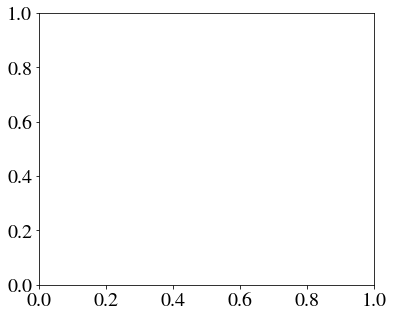

In [155]:
import mkipp
mkipp.kipp_plot(mkipp.Kipp_Args(logs_dirs=[DATA+"LOGS"],save_filename = "Kippenhahn_r.pdf",xaxis = "star_age",yaxis='radius'))
FILENAME = "kipp_eng_m.pdf"
plt.savefig(FILENAME)    


In [ ]:
import mkipp
h = mr.MesaData(DATA+'LOGS/history.data')
age=h.star_age
area=h.Engulfed_fraction
destruction=h.Log_Destruction_factor
dyn_start=np.where(area > 0.999)[0][0]
dyn_end=np.where(destruction > 0.0)[0][0]
#xlims = [(age[dyn_start])-0.0000006,(age[dyn_end]*1e-6)+0.0000005]
xlims = [age[dyn_start]+0.3,age[dyn_end]+0.01]


print(xlims)
#xlims=[0,750]
#mkipp.kipp_plot(mkipp.Kipp_Args(logs_dirs=["1.0_energy_injection_runs/LOGS"],save_filename = "Kippenhahn_r.pdf",xaxis = "star_age",yaxis='radius', time_units = "yr"),xlims = xlims)
mkipp.kipp_plot(mkipp.Kipp_Args(logs_dirs=[DATA+"LOGS"],save_filename = "Kippenhahn_r.pdf",xaxis = "model_number",yaxis='radius'),xlims = [0,2100])
